# Entrenando un clsificador binario
Vamos a simplificar un poco el problema y nos centraremos en la distinción de un solo dígito, específicamente el "3". La tarea consiste en desarrollar un modelo capaz de discernir si una imagen pertenece o no a la clase de dígitos "3". Esto será un ejemplo de clasificador binario, ya que solo tenemos dos posibilidades, si o no.

Vamos a crear los vectores objetivo, previa división en train, test, validation:

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

X, y = mnist.data.to_numpy(), mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_3 = (y_train == '3') 
y_test_3 = (y_test == '3')

/home/nelo/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Este código marcará como verdadero aquellos elementos que esten etiquetados como 3, y falso el resto.

Una vez hecho esto, vamos a elegir un clsificador y entrenar nuestro modelo. En este caso optaremos por un árbol de decisión:

In [2]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train_3)

DecisionTreeClassifier(random_state=42)

Perfecto, ya tenemos el modelo entrenado, ahora tendremos que ver si este funciona de forma correcta. Para ello, podemos elegir un elemento de nuestros datos correspondiente a un 3 y ver si lo clasifica bien:

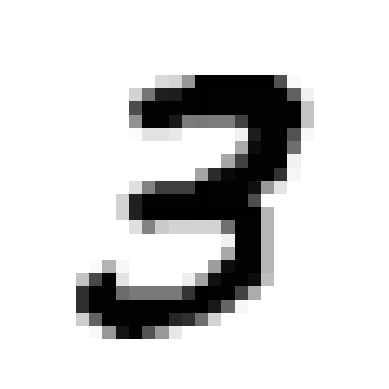

array([ True])

In [3]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[7]
plot_digit(some_digit)
plt.show()

clf.predict([some_digit])

Perfecto! Ahora vamos a evaluar el rendimiento del modelo.

## Medir la precisión con validación cruzada
Anteriormente ya hemos visto como funciona la validación cruzada y como medir el rendimiento de los modelos con ella. Vamos a validar nuestro modelo con un total de tres iteraciones:


In [4]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.96015, 0.9602 , 0.9627 ])

¡Madre mía! Más del 95% en cada uno de los pliegues, ¿es esto posible? Lógicamente no, el problema es muy simple, si nos paramos a pensar, el 10% de los valores pertenecen a un 3 y si incias que no es un 3 el valor que estás prediciendo, acertarás el 90% de las veces, por lo tanto, la precisión generalmente no es la única ni la medida de desempeño preferida para evaluar clasificadores, especialmente en casos donde el conjunto de datos presenta desbalances entre las clases.

Llegados a este punto, vamos a ver las distintas métricas utilizadas para la clasificación.